<a href="https://colab.research.google.com/github/JangAyeon/Python_Machine_Learning/blob/main/%5B6_3%5DLDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**붓꽃 데이터 셋에 LDA 적용하기**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [7]:
iris=load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data)

In [8]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled,iris.target)
iris_lda=lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


In [10]:
lda_columns=["lda_component_1","lda_component_2"]
iris_df_lda=pd.DataFrame(iris_lda,columns=lda_columns)
iris_df_lda["target"]=iris.target

iris_df_lda.head()

,lda_component_1,lda_component_2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0


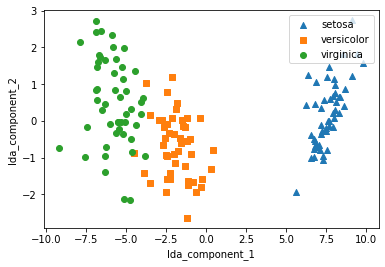

In [11]:
#setosa : 세모, versicolor : 네모, virginica : 동그라미
markers=["^","s","o"]

for i, marker in enumerate(markers):
  x_axis_data=iris_df_lda[iris_df_lda["target"]==i]["lda_component_1"]
  y_axis_data=iris_df_lda[iris_df_lda["target"]==i]["lda_component_2"]

  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend(loc="upper right")
plt.xlabel("lda_component_1")
plt.ylabel("lda_component_2")
plt.show()

#**PCA**

In [13]:
iris=load_iris()
columns=["sepal_length","sepal_width","petal_length","petal_width"]
iris_df=pd.DataFrame(iris.data,columns=columns)
iris_df["target"]=iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
iris_scaled=StandardScaler().fit_transform(iris_df.iloc[:,:-1])

In [15]:
pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [22]:
pca_columns=["pca_component_1","pca_component_2"]
iris_df_pca=pd.DataFrame(iris_pca,columns=pca_columns)
iris_df_pca["target"]=iris.target
iris_df_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


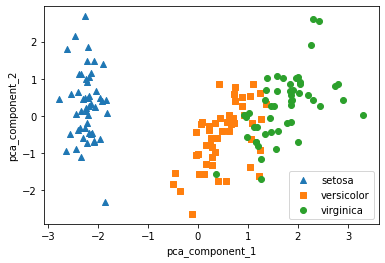

In [23]:
#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()